In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [37]:
(train_images,train_labels), (test_images,test_label)= fashion_mnist.load_data()

In [92]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [93]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [94]:
class_names = ['T-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'Sandal','Shirt',
              'Sneaker', 'Bag','Ankle-Boot']

In [95]:
train_images.shape

(60000, 28, 28)

In [96]:
test_label

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [97]:
test_images.shape

(10000, 28, 28)

## Preprocess Data

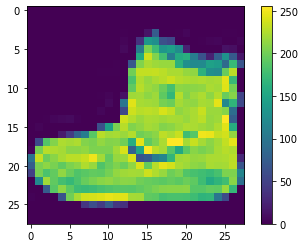

In [98]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [99]:
# Scaling the value
train_images = train_images/255.0
test_images = test_images/255.0


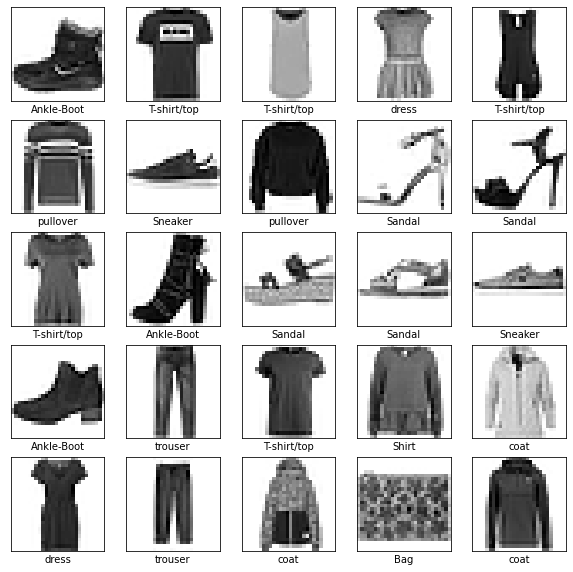

In [100]:
# Plotting first 25 img along with labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building Model

In [119]:
model = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(128,
            activation='relu'),
     tf.keras.layers.Dense(10)
    
])



                             


## Compiling
model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer='adam',
        metrics=['accuracy'])

In [120]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Training the CNN

In [121]:
# Adding an empty color dimension as cnn might expect it

# Training 
history = model.fit(
                    train_images,train_labels,
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5004 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3778 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3402 - accuracy: 0.8751
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3148 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3000 - accuracy: 0.8892
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2828 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2714 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2596 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2513 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.241

## Evaluate accuracy

In [122]:
test_loss , test_acc = model.evaluate(test_images, test_label, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3539 - accuracy: 0.8740 - 328ms/epoch - 1ms/step

Test accuracy: 0.8740000128746033


## Making Prediction

In [123]:
probablity_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [124]:
predictions = probablity_model.predict(test_images)

In [125]:
predictions[0]

array([7.3501503e-04, 9.5349782e-07, 1.8012644e-05, 2.2485217e-06,
       2.2609352e-06, 2.2746861e-02, 4.8451049e-05, 9.1265500e-02,
       5.4604100e-04, 8.8463461e-01], dtype=float32)

In [126]:
np.argmax(predictions[0])

9

In [127]:
test_label[0]

9

 Matches with test label

In [128]:
# Graphing fuction
def plot_image(i, prediction_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap= plt.cm.binary)
    
    predicted_label = np.argmax(prediction_array)
    if predicted_label==true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(prediction_array),
                                        class_names[true_label]),
                                        color= color)
    
def plot_value_array(i, prediction_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction_array, color = '#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(prediction_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

## Verify Prediction

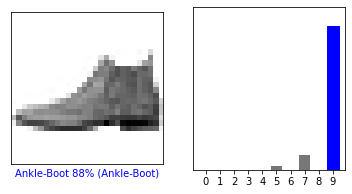

In [129]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_label, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_label)
plt.show()

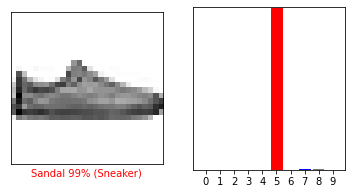

In [130]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_label, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_label)
plt.show()

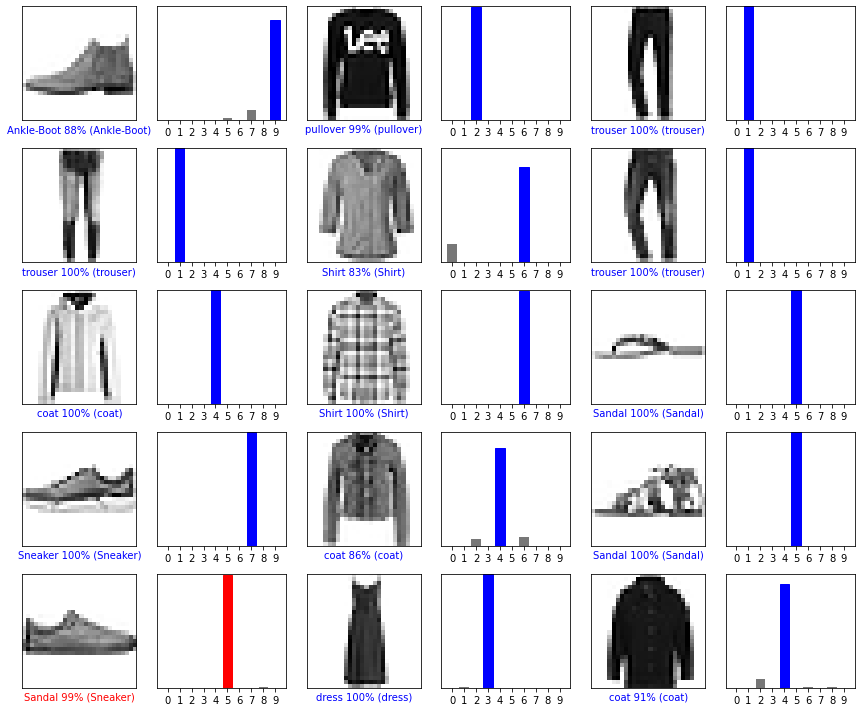

In [131]:
# Plot the first X test images, their orediction label and true label
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_label, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_label)
plt.tight_layout()
plt.show()